# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# %matplotlib

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [194]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [195]:
tips.drop(columns=['Unnamed: 0'], inplace=True)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 5. Plot the total_bill column histogram

In [196]:
# numpy histogram function. this returns the same results as the matplotlib plt.hist tool
# see https://numpy.org/doc/stable/reference/generated/numpy.histogram.html?highlight=histogram#numpy.histogram for more info
# see example here: https://www.datacamp.com/community/tutorials/histograms-matplotlib

hist, bin_edges = np.histogram(tips['total_bill'], bins='auto')
hist

array([ 2, 14, 45, 48, 39, 30, 21, 15,  9,  7,  6,  2,  2,  4],
      dtype=int64)

In [197]:
# setting bins='auto' provides the maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance.
# see https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges
# for more info.
bin_edges

array([ 3.07,  6.48,  9.89, 13.3 , 16.71, 20.12, 23.53, 26.94, 30.35,
       33.76, 37.17, 40.58, 43.99, 47.4 , 50.81])

In [198]:
# from  hist and bin edges we have:
# 2 total bills that lie in the interval (bin) 3.07-6.48 (great than or equal to 3.07 but less than 6.48)
# 14 total bills that lie in the bin 6.48-9.89, and so on, until finally,
# 4 total bills that lie in the last bin 47.4-50.81 

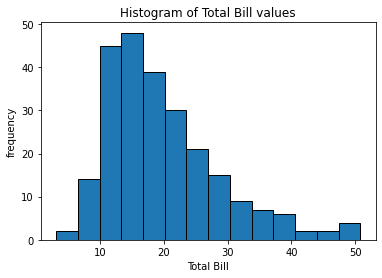

In [199]:
plt.hist(tips['total_bill'], bins='auto', edgecolor='black')

plt.xlabel('Total Bill')
plt.ylabel('frequency')
plt.title('Histogram of Total Bill values')

plt.show()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

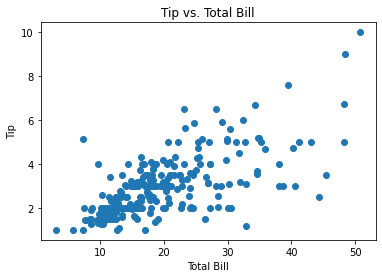

In [200]:
plt.scatter(tips['total_bill'], tips['tip'])

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip vs. Total Bill')

plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

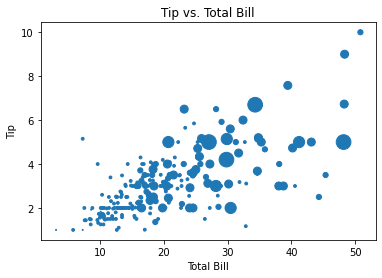

In [201]:
plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']**3)

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip vs. Total Bill')

plt.show()

### Step 8. Present the relationship between days and total_bill value

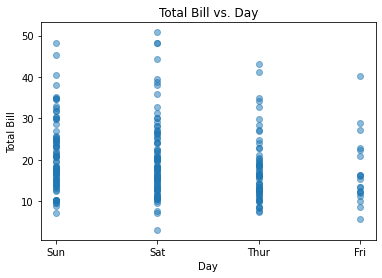

In [202]:
plt.scatter(tips['day'], tips['total_bill'], alpha=0.5)

plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Total Bill vs. Day')

plt.show()

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

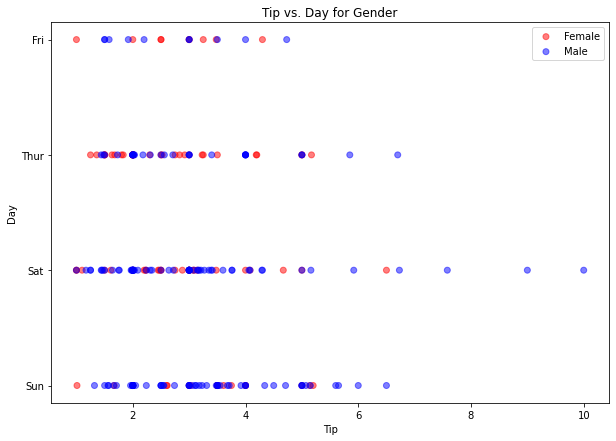

In [203]:
tips['colours'] = tips['sex'].apply(lambda x: 'blue' if x == 'Male' else 'red')

fig = plt.figure(figsize =(10, 7)) 

for gender, group in tips.groupby('sex'):
    plt.scatter(group['tip'], group['day'], c=group['colours'], label=gender, alpha=0.5)

plt.xlabel('Tip')
plt.ylabel('Day')
plt.title('Tip vs. Day for Gender')
plt.legend()

plt.show()

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

In [204]:
# see bar chart example here:
# https://www.pythoncharts.com/2019/03/26/grouped-bar-charts-matplotlib/

# group by day and time
grp = tips.groupby(by=['day', 'time']).sum()
grp

total_bill     tip  size
day  time                            
Fri  Dinner      235.96   35.28    26
     Lunch        89.92   16.68    14
Sat  Dinner     1778.40  260.40   219
Sun  Dinner     1627.16  247.39   216
Thur Dinner       18.78    3.00     2
     Lunch      1077.55  168.83   150

In [205]:
# unstack the group to get dinner/lunch values and fill in missing values with zero
# unstack(0) refers to level 0, ie days, unstack(1) refers to level 1, ie time
grp_unstacked = grp.unstack(0)['total_bill'].fillna(value=0)

#re-arrange columns
cols = ['Thur', 'Fri', 'Sat', 'Sun']
grp_unstacked = grp_unstacked[cols]
grp_unstacked

day,Thur,Fri,Sat,Sun
time,,,,
Dinner,18.78,235.96,1778.4,1627.16
Lunch,1077.55,89.92,0.0,0.00


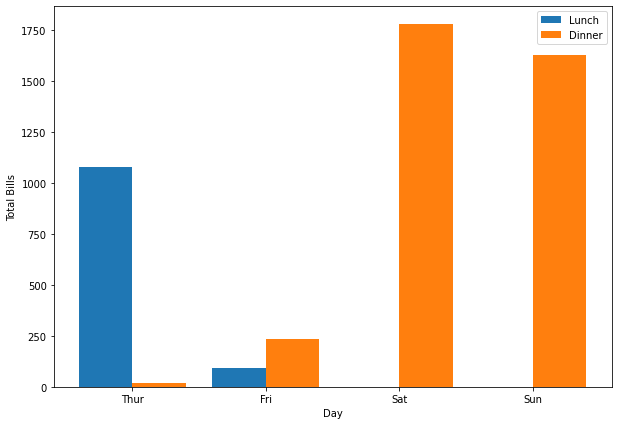

In [206]:
# count unique days to define number of bar pairs 
x = np.arange(tips['day'].nunique())
barwidth = 0.4

fig = plt.figure(figsize =(10, 7)) 

plt.bar(x - barwidth/2, grp_unstacked.loc['Lunch'], label='Lunch', width=barwidth)
plt.bar(x + barwidth/2, grp_unstacked.loc['Dinner'], label='Dinner', width=barwidth)

#set xlabels
plt.xticks(x, labels=grp_unstacked.columns)
plt.xlabel('Day')
plt.ylabel('Total Bills')
plt.legend()

plt.show()


In [207]:
lunchtips = tips[tips['time'] == 'Lunch']
dinnertips = tips[tips['time'] == 'Dinner']

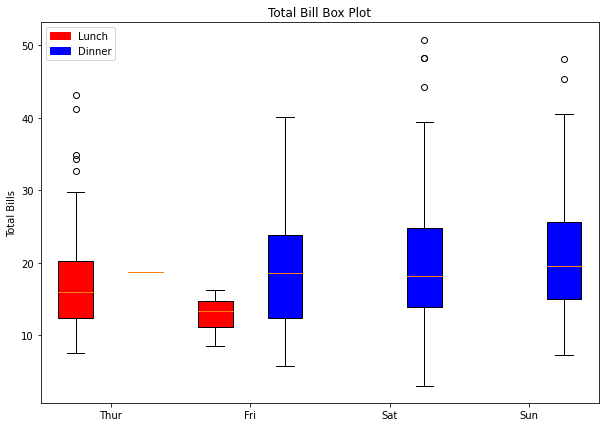

In [208]:
# Set figure size
fig = plt.figure(figsize =(10, 7)) 

# Create plots
# set whiskers to 1.5xIQR where IQR = Q3 - Q1 and is the inter quartile range
# data = [lunchtips['total_bill'], dinnertips['total_bill']]
data = []
days = ['Thur', 'Fri', 'Sat', 'Sun']

for day in days:
    data.append(lunchtips[lunchtips['day'] == day]['total_bill'])
    data.append(dinnertips[dinnertips['day'] == day]['total_bill'])

bplot = plt.boxplot(data, whis=1.5, patch_artist=True)

# colour fill boxes
colours = []
for day in days:
    colours.append('red')
    colours.append('blue')

for patch, colour in zip(bplot['boxes'], colours):
    patch.set_facecolor(colour)

plt.xticks([1.5, 3.5, 5.5, 7.5], days)
plt.ylabel('Total Bills')
plt.title('Total Bill Box Plot')

# legend setup
red_patch = mpatches.Patch(color='red')
blue_patch = mpatches.Patch(color='blue')
plt.legend((red_patch, blue_patch), ('Lunch', 'Dinner'))

plt.show()

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

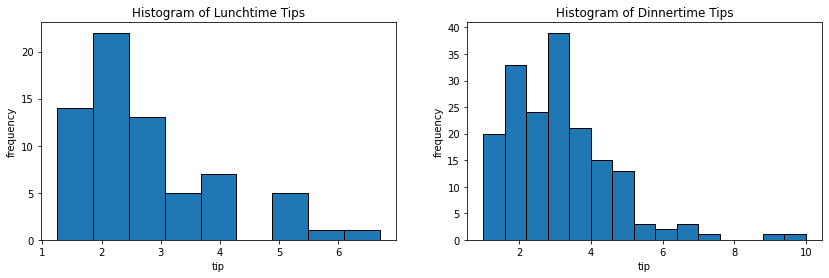

In [209]:
# create 2 side by side subplots and define size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# lunchtime tips
axes[0].hist(lunchtips['tip'], bins='auto', edgecolor='black')

axes[0].set_xlabel('tip')
axes[0].set_ylabel('frequency')
axes[0].set_title('Histogram of Lunchtime Tips')

# dinnertime tips
axes[1].hist(dinnertips['tip'], bins='auto', edgecolor='black')

axes[1].set_xlabel('tip')
axes[1].set_ylabel('frequency')
axes[1].set_title('Histogram of Dinnertime Tips')

plt.show()

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

In [210]:
male_nosmoke = (tips['sex'] == 'Male') & (tips['smoker'] == 'No')
male_smoker =  (tips['sex'] == 'Male') & (tips['smoker'] == 'Yes')

female_nosmoke = (tips['sex'] == 'Female') & (tips['smoker'] == 'No')
female_smoker =  (tips['sex'] == 'Female') & (tips['smoker'] == 'Yes')

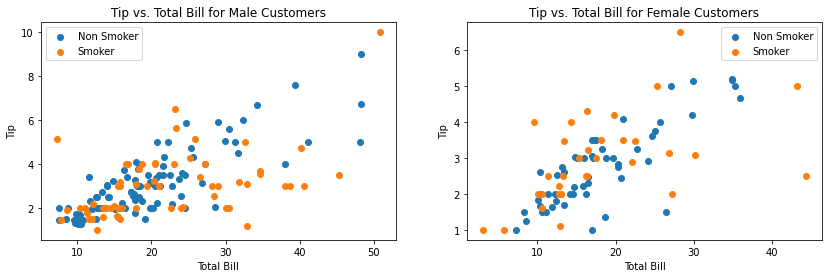

In [211]:
# create 2 side by side subplots and define size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Male total_bill vs tip 
axes[0].scatter(tips[male_nosmoke]['total_bill'], tips[male_nosmoke]['tip'], label='Non Smoker')
axes[0].scatter(tips[male_smoker]['total_bill'], tips[male_smoker]['tip'], label='Smoker')

axes[0].set_xlabel('Total Bill')
axes[0].set_ylabel('Tip')
axes[0].set_title('Tip vs. Total Bill for Male Customers')
axes[0].legend()

# Female total_bill vs tip 
axes[1].scatter(tips[female_nosmoke]['total_bill'], tips[female_nosmoke]['tip'], label='Non Smoker')
axes[1].scatter(tips[female_smoker]['total_bill'], tips[female_smoker]['tip'], label='Smoker')

axes[1].set_xlabel('Total Bill')
axes[1].set_ylabel('Tip')
axes[1].set_title('Tip vs. Total Bill for Female Customers')
axes[1].legend()

plt.show()

### BONUS: Create your own question and answer it using a graph.